<a href="https://colab.research.google.com/github/welikeWatermelon/Data_analist/blob/main/Data_Analist_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API 사용하기
## API
: 두 프로그램이 서로 대화하기 위한 방법을 정의함    
만약 프로그램 A와 프로그램 B가 데이터를 주고받는 규칙이 다르다면 올바르게 데이터를 처리하지 못함.   
*프로그램 A <- 프로그램 B (데이터 요청_HTTP)*  
*프로그램 A -> 프로그램 B (데이터 전송_CSV,JSON,XML)*

### HTTP
: 웹 서버 프로그램은 웹 브라우저와 통신할 때 HTTP란 프로토콜(통신 규약)을 사용함  
*웹 서버 <- 웹 브라우저 (웹 데이터 요청)*  
*웹 서버 -> 웹 브라우저 (웹 데이터 전송)*
#### HTML
: 웹 부라우저가 화면에 표시할 수 있는 문서의 한 종류이자 웹 페이지를 위한 표준 언어


## JSON
: JavaScript Object Notation  
-> 딕셔너리와 리스트를 중첩해 놓은 구조  
-> 큰따옴표("")로 감싸주어야 함

프로그램 A <- 프로그램 B (데이터 요청)  
프로그램 A -> 프로그램 B (텍스트 전송 : {"name":"혼자 공부하는 데이터 분석"})  

프로그램 A : 파이썬 객체에서 json.dumps()를 사용하여 문자열로 바꿈
프로그램 B : 문자열을 전달받고, 문자열을 파이썬 객체로 바꿈(dict)


In [ ]:
d={"name": "혼자 공부하는 데이터 분석"} #JSON 형식
print(d['name'])

혼자 공부하는 데이터 분석


### 파이썬 객체를 JSON 문자열로 변환하기 : json.dumps() 함수
(json -> 파이썬에서 사용할 문자열)  
이때, ensure_ascii = False : 딕셔너리 d에 한글이 포함되어 있기 때문

In [ ]:
import json
d_str = json.dumps(d,ensure_ascii=False)
print(d_str)
print()
print(type(d_str))

{"name": "혼자 공부하는 데이터 분석"}

<class 'str'>


### JSON 문자열을 파이썬 객체로 변환하기 : json.loads() 함수

In [ ]:
d2=json.loads(d_str)
print(d2['name'])
print()
print(type(d2))

혼자 공부하는 데이터 분석

<class 'dict'>


In [ ]:
d3=json.loads('{"name":"혼자 공부하는 데이터 분석", "author" : "박해선", "year" : 2022}')
print(type(d3))
print(d3['name'])
print(d3['author'])
print(d3['year'])

<class 'dict'>
혼자 공부하는 데이터 분석
박해선
2022


In [ ]:
d3=json.loads('{"name":"혼자 공부하는 데이터 분석", "author" : ["박해선","홍길동"], "year" : 2022}')
print(d3['author'][1])

홍길동


In [ ]:
d4_str="""
[
  {"name":"혼자 공부하는 데이터 분석", "author" : "박해선", "year" : 2022},
  {"name":"혼자 공부하는 머신러닝", "author" : "박해선", "year" : 2020}
]
"""
d4 = json.loads(d4_str)
print(d4[0]['name'])

혼자 공부하는 데이터 분석


### JSON 문자열을 데이터프레임으로 변환하기
+ read_json() 함수
* DataFrame() 함수

In [ ]:
import pandas as pd
pd.read_json(d4_str)

,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,혼자 공부하는 머신러닝,박해선,2020


In [ ]:
pd.DataFrame(d4)

,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,혼자 공부하는 머신러닝,박해선,2020


## XML
: eXtensible Markup Language   
엘리먼트들이 계층 구조를 이루면서 정보를 표현   
태그 사용 ex.\<name> : 시작태그, \</name> : 종료태그   
book : 부모노드  
name : 자식노드

### XML 문자열을 파이썬 객체로 변환 : fromstring() 함수

In [ ]:
# @title XML의 예시
#문자열
x_str = """
<book>
  <name>혼자 공부하는 데이터 분석</name>
  <author>박해선</author>
  <year>2022</year>
</book>
"""

xml 패키지는 파이썬으로 기본으로 제공하는 간편한 API임   
xml.etree.ElementTree 모듈의 fromstring() 함수를 사용해 x_str 문자열을 XML로 반환

**문자열 -> XML **

In [ ]:
import xml.etree.ElementTree as et
book = et.fromstring(x_str)
print(type(book))
print(book.tag) #book 에서 가장 먼저 등장하는 부모 엘리먼트 반환
print(book)

<class 'xml.etree.ElementTree.Element'>
book
<Element 'book' at 0x787282302520>


### 자식엘리먼트 확인하기 : findtext() 메서드

#### 이렇게 자식 엘리먼트 순서가 항상 일정하다는 것을 보장하지 않음

In [ ]:
book_childs = list(book)
print(book_childs)

name, author, year = book_childs
print(name.text) #text 속성으로 엘리먼트에 있는 텍스트 추출
print(author.text)
print(year.text)

[<Element 'name' at 0x787282302570>, <Element 'author' at 0x7872823025c0>, <Element 'year' at 0x787282302610>]
혼자 공부하는 데이터 분석
박해선
2022


#### findtext() 메서드
순서가 일정하지 않아도 원하는 자식 엘리먼트를 탐색함

In [ ]:
name = book.findtext('name')
author = book.findtext('author')
year = book.findtext('year')
print(name)
print(author)
print(year)

혼자 공부하는 데이터 분석
박해선
2022


In [ ]:
x2_str = """
<books>
  <book>
    <name>혼자 공부하는 데이터 분석</name>
    <author>박해선</author>
    <year>2022</year>
  </book>
  <book>
    <name>혼자 공부하는 머신러닝+딥러닝</name>
    <author>박해선</author>
    <year>2020</year>
  </book>
</books>
"""

In [ ]:
books = et.fromstring(x2_str) #문자열 > 파이썬 객체로 변환
print(books.tag)

books


### 여러개의 자식 확인하기 : findall() + for문

In [ ]:
for book in books.findall('book'): #book의 이름을 가진 자식들 확인하
  name = book.findtext('name')
  author = book.findtext('author')
  year = book.findtext('year')
  print(name)
  print(author)
  print(year)
  print()

혼자 공부하는 데이터 분석
박해선
2022

혼자 공부하는 머신러닝+딥러닝
박해선
2020



## API 실습

In [ ]:
import requests
url = "https://data4library.kr/api/loanItemSrch?format=json&startDt=2021-04-01&endDt=2021-04-30&age=20&authKey=6b85ee333741c89472407e57706a8c20defa02eaa5c36e9c0abfccdd7800e0b2"
r=requests.get(url) # requests.get() 함수가 반환하는 값은 API 호출의 결과를 담고 있는 requests 패키지의 Response 클래스 객체
data = r.json() # 웹 서버로부터 받은 json 문자열을 파이썬 객체로 변환하여 반환함
print(data)
print(type(data))

{'response': {'request': {'startDt': '2021-04-01', 'endDt': '2021-04-30', 'age': '20', 'pageNo': 1, 'pageSize': 200}, 'resultNum': 200, 'numFound': 5000, 'docs': [{'doc': {'no': 1, 'ranking': '1', 'bookname': '우리가 빛의 속도로 갈 수 없다면 :김초엽 소설 ', 'authors': '지은이: 김초엽', 'publisher': '허블', 'publication_year': '2019', 'isbn13': '9791190090018', 'addition_symbol': '03810', 'vol': '', 'class_no': '813.7', 'class_nm': '문학 > 한국문학 > 소설', 'loan_count': '488', 'bookImageURL': 'https://image.aladin.co.kr/product/19359/16/cover/s972635417_1.jpg', 'bookDtlUrl': 'https://data4library.kr/bookV?seq=5430429'}}, {'doc': {'no': 2, 'ranking': '2', 'bookname': '달러구트 꿈 백화점 :이미예 장편소설', 'authors': '지은이: 이미예', 'publisher': '팩토리나인', 'publication_year': '2020', 'isbn13': '9791165341909', 'addition_symbol': '03810', 'vol': '', 'class_no': '813.7', 'class_nm': '문학 > 한국문학 > 소설', 'loan_count': '408', 'bookImageURL': 'https://image.aladin.co.kr/product/24512/70/cover/k392630952_1.jpg', 'bookDtlUrl': 'https://data4library.kr

In [ ]:
data

{'response': {'request': {'startDt': '2021-04-01',
   'endDt': '2021-04-30',
   'age': '20',
   'pageNo': 1,
   'pageSize': 200},
  'resultNum': 200,
  'numFound': 5000,
  'docs': [{'doc': {'no': 1,
     'ranking': '1',
     'bookname': '우리가 빛의 속도로 갈 수 없다면 :김초엽 소설 ',
     'authors': '지은이: 김초엽',
     'publisher': '허블',
     'publication_year': '2019',
     'isbn13': '9791190090018',
     'addition_symbol': '03810',
     'vol': '',
     'class_no': '813.7',
     'class_nm': '문학 > 한국문학 > 소설',
     'loan_count': '488',
     'bookImageURL': 'https://image.aladin.co.kr/product/19359/16/cover/s972635417_1.jpg',
     'bookDtlUrl': 'https://data4library.kr/bookV?seq=5430429'}},
   {'doc': {'no': 2,
     'ranking': '2',
     'bookname': '달러구트 꿈 백화점 :이미예 장편소설',
     'authors': '지은이: 이미예',
     'publisher': '팩토리나인',
     'publication_year': '2020',
     'isbn13': '9791165341909',
     'addition_symbol': '03810',
     'vol': '',
     'class_no': '813.7',
     'class_nm': '문학 > 한국문학 > 소설',
     'loa

### data의 정보에서 필요한 값들 (doc)만 빼와서 books의 리스트에 저장

In [ ]:
books = []
for d in data['response']['docs']:
  books.append(d['doc'])
books

[{'no': 1,
  'ranking': '1',
  'bookname': '우리가 빛의 속도로 갈 수 없다면 :김초엽 소설 ',
  'authors': '지은이: 김초엽',
  'publisher': '허블',
  'publication_year': '2019',
  'isbn13': '9791190090018',
  'addition_symbol': '03810',
  'vol': '',
  'class_no': '813.7',
  'class_nm': '문학 > 한국문학 > 소설',
  'loan_count': '488',
  'bookImageURL': 'https://image.aladin.co.kr/product/19359/16/cover/s972635417_1.jpg',
  'bookDtlUrl': 'https://data4library.kr/bookV?seq=5430429'},
 {'no': 2,
  'ranking': '2',
  'bookname': '달러구트 꿈 백화점 :이미예 장편소설',
  'authors': '지은이: 이미예',
  'publisher': '팩토리나인',
  'publication_year': '2020',
  'isbn13': '9791165341909',
  'addition_symbol': '03810',
  'vol': '',
  'class_no': '813.7',
  'class_nm': '문학 > 한국문학 > 소설',
  'loan_count': '408',
  'bookImageURL': 'https://image.aladin.co.kr/product/24512/70/cover/k392630952_1.jpg',
  'bookDtlUrl': 'https://data4library.kr/bookV?seq=5707051'},
 {'no': 3,
  'ranking': '3',
  'bookname': '지구에서 한아뿐 :정세랑 장편소설 ',
  'authors': '지은이: 정세랑',
  'publisher'

*판다스 데이터 프레임으로 표시*

In [ ]:
books_df=pd.DataFrame(books)
books_df

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL,bookDtlUrl
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.7,문학 > 한국문학 > 소설,488,https://image.aladin.co.kr/product/19359/16/co...,https://data4library.kr/bookV?seq=5430429
1,2,2,달러구트 꿈 백화점 :이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,03810,,813.7,문학 > 한국문학 > 소설,408,https://image.aladin.co.kr/product/24512/70/co...,https://data4library.kr/bookV?seq=5707051
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,03810,,813.7,문학 > 한국문학 > 소설,397,https://image.aladin.co.kr/product/19804/82/co...,https://data4library.kr/bookV?seq=5446546
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,03810,,813.7,문학 > 한국문학 > 소설,393,https://image.aladin.co.kr/product/24131/37/co...,https://data4library.kr/bookV?seq=5674475
4,5,5,아몬드손원평 장편소설,손원평,창비,2017,9788936434267,03810,,813.7,문학 > 한국문학 > 소설,391,http://image.aladin.co.kr/product/16839/4/cove...,https://data4library.kr/bookV?seq=3423096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,194,열두 발자국,지은이: 정재승,어크로스,2018,9791160560510,03400,,404,"자연과학 > 자연과학 > 강연집, 수필집, 연설문집",80,https://image.aladin.co.kr/product/15072/28/co...,https://data4library.kr/bookV?seq=3767852
196,197,197,죽음 :베르나르 베르베르 장편소설,지은이: 베르나르 베르베르 ;옮긴이: 전미연,열린책들,2019,9788932919676,04860,1,863,문학 > 프랑스문학 > 소설,79,https://image.aladin.co.kr/product/19183/62/co...,https://data4library.kr/bookV?seq=5408151
197,198,197,심판,베르나르 베르베르 지음 ;전미연 옮김,열린책들,2020,9788932920405,03860,,862,문학 > 프랑스문학 > 희곡,79,https://image.aladin.co.kr/product/24919/70/co...,https://data4library.kr/bookV?seq=5738734
198,199,197,어떤 죽음이 삶에게 말했다 :생의 남은 시간이 우리에게 들려주는 것,김범석 지음,흐름출판,2021,9788965964230,03810,,814.7,문학 > 한국문학 > 수필,79,https://image.aladin.co.kr/product/26120/62/co...,https://data4library.kr/bookV?seq=5850509


books_df의 내용을 JSON으로 변환하여 저장

In [ ]:
books_df.to_json('20s_best_book.json')

# 웹 스크래핑(크롤링) 사용하기
: 프로그램으로 웹 사이트의 페이지를 옮겨 가면서 데이터를 추출하는 작업

## 검색 결과 페이지 가져오기

In [ ]:
import gdown
gdown.download('https://bit.ly/3q9SZix', '20s_best_book.json',quiet=False)

Downloading...
From: https://bit.ly/3q9SZix
To: /content/20s_best_book.json
100%|██████████| 92.9k/92.9k [00:00<00:00, 11.1MB/s]


'20s_best_book.json'

In [ ]:
books_df=pd.read_json('20s_best_book.json')
books_df.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.7,문학 > 한국문학 > 소설,461,https://image.aladin.co.kr/product/19359/16/co...
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,03810,,813.7,문학 > 한국문학 > 소설,387,https://image.aladin.co.kr/product/24512/70/co...
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,03810,,813.7,문학 > 한국문학 > 소설,383,https://image.aladin.co.kr/product/19804/82/co...
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,03810,,813.7,문학 > 한국문학 > 소설,370,https://image.aladin.co.kr/product/24131/37/co...
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267,03810,,813.7,문학 > 한국문학 > 소설,365,http://image.aladin.co.kr/product/16839/4/cove...


<특정 열만 선택하는 과정>

In [ ]:
books=books_df[['no','ranking','authors','publisher','publication_year','isbn13']]
books.head()

,no,ranking,authors,publisher,publication_year,isbn13
0,1,1,지은이: 김초엽,허블,2019,9791190090018
1,2,2,지은이: 이미예,팩토리나인,2020,9791165341909
2,3,3,지은이: 정세랑,난다,2019,9791188862290
3,4,4,지은이: 정세랑,문학동네,2020,9788954672214
4,5,5,지은이: 손원평,창비,2017,9788936434267


### 데이터 프레임의 행과 열만 생각하기 : loc 메서드
사용법 : dataframe.lco[[행시작~행끝],[열이름1.열이름2,...]]

In [ ]:
books_df.loc[[0,1],['bookname','authors']]

,bookname,authors
0,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽
1,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예


#### 슬라이스 연산자 사용

In [ ]:
books_df.loc[0:1,'bookname':'authors']

,bookname,authors
0,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽
1,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예


In [ ]:
books=books_df.loc[:,'no':'isbn13']
books.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267


### 검색 결과 페이지 HTML 가져오기 : reaquests.get() 함수

In [ ]:
import requests
isbn = 9791190090018
url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
r = requests.get(url.format(isbn)) #format 함수로 query 값 전달함
print(r.text)






	<!DOCTYPE html >
	<html lang="ko">

<head>
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title> 9791190090018 - 예스24</title> 

	<meta name="title" content="예스24" />
	<meta name="description" content="YOUR EVERY STORY 문화 콘텐츠 플랫폼, 예스24" />
	<meta name="keywords" content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘, 리센스, 예스24 도서용품, 친환경 PB 브랜드, 사은품, 굿즈" />


	<link title="YES24" rel="search" type="application/opensearchdescription+xml" href="//www.yes24.com/OpensearchDescription.xml">

	<script type="text/javascript

## HTML에서 데이터 추출하기 : 뷰티풀수프
### 뷰티풀스프 : HTML안에 있는 내용을 찾을때 사용하는 파이썬 패키지

### 크롬 개발자 도구로 HTML 태그 찾기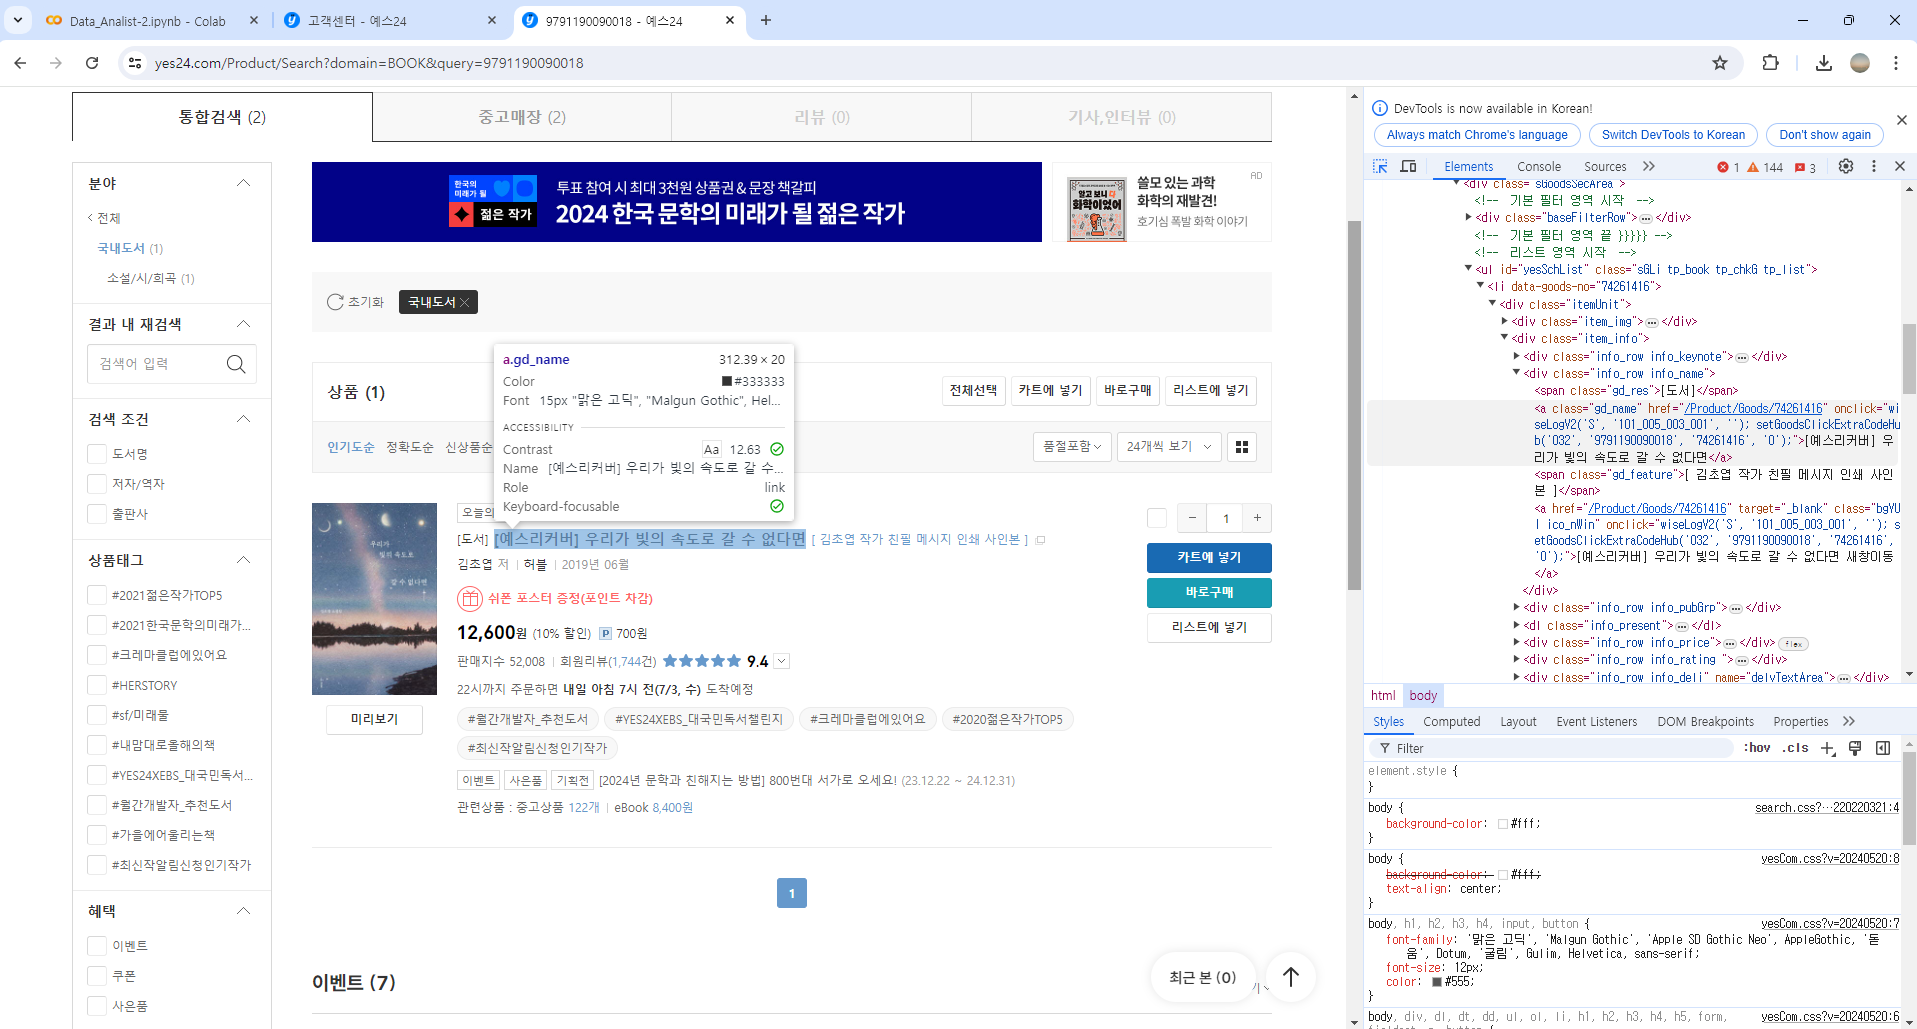

F12를 이용한뒤 Select 아이콘을 클릭하고 마우스커서를 원하는 위치에 갖다대면 됨

**파서** : 입력 데이터를 받아 데이터 구조를 만드는 소프트웨어 라이브러리

**파싱** : 위의 과정

*htmk.parser*는 파이썬에 기본 내장된 HTML 파서임.

In [ ]:
from bs4 import BeautifulSoup # 뷰티플수프 패키지에서 BeautifulSoup 클래스 임포트
soup = BeautifulSoup(r.text,'html.parser') # 이 클래스의 객체 생성한 뒤 첫 번째 매개변수는 파싱할 HTML 문서이고, 두 번째는 파싱에 사용할 파서

### 태그 위치 찾기 : find()메서드
첫 번째 매개변수에는 찾을 태그 이름을 지정하고,

attrs 매개변수에는 찾으려는 태그의 속성을 딕셔너리로 지정하면 됨

In [ ]:
prd_link = soup.find('a', attrs={'class':'gd_name'})
print(prd_link)
print()
print(prd_link['href'])

<a class="gd_name" href="/Product/Goods/74261416" onclick="wiseLogV2('S', '101_005_003_001', ''); setGoodsClickExtraCodeHub('032', '9791190090018', '74261416', '0');">[예스리커버] 우리가 빛의 속도로 갈 수 없다면</a>

/Product/Goods/74261416


### 도서 상세 페이지 HTML 가져오기

In [ ]:
url = 'http://www.yes24.com'+prd_link['href']
r = requests.get(url)
print(r.text)








	<!DOCTYPE html >
	<html lang="ko">

<head><link rel="canonical" href="https://m.yes24.com/Goods/Detail/74261416">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title>[예스리커버] 우리가 빛의 속도로 갈 수 없다면 - 예스24 </title> 

	
<meta name="title" content="[예스리커버] 우리가 빛의 속도로 갈 수 없다면"/>
<meta name="author" content="김초엽 저" />
	
<meta name="description" content="김초엽 저. 허블. 구매혜택:쉬폰 포스터 증정(포인트 차감). 판매가 12,600원(10% 할인). 포인트 700원(5% 적립). 2019년 서울국제도서전 〈여름, 첫 책〉으로 처음 독자와 만난 후, 중국 양대 SF문학상인 〈은하상〉과 〈중국성운상〉을 수상하는..."/>
	
<meta name="keywords" content="월간개발자_추천도서,YES24XEBS_대국민독서챌린지,크레마클럽에있어요,2020젊은작가TOP5,최신작알림신청인기작가,2021젊은

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')
prd_detail = soup.find('div',attrs={'id':'infoset_specific'})
print(prd_detail)

<div class="gd_infoSet infoSet_noLine" id="infoset_specific">
<div class="tm_infoSet">
<h4 class="tit_txt">품목정보</h4>
</div>
<div class="infoSetCont_wrap">
<div class="yesTb">
<table class="tb_nor tb_vertical" summary="품목정보 국내도서, 외국도서 " width="100%">
<caption>품목정보</caption>
<colgroup>
<col width="170"/>
<col width="*"/>
</colgroup>
<tbody class="b_size">
<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2019년 06월 24일</td>
</tr>
<tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">330쪽 | 496g | 130*198*30mm</td>
</tr>
<tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9791190090018</td>
</tr>
<tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">1190090015</td>
</tr>
</tbody>
</table>
</div>
</div>
<script type="text/javascript">
        if ($("#infoset_specific table tbody tr").length == 0) {
            $("#infoset_specific").remove();
        }
    </script>
</div>


### 테이블 태그를 리스트로 가져오기 : find_all() 메서드
-> 특정 HTML 태그를 모두 찾아서 리스트로 반환해 줌

In [ ]:
prd_tr_list = prd_detail.find_all('tr')
print(prd_tr_list)

[<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2019년 06월 24일</td>
</tr>, <tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">330쪽 | 496g | 130*198*30mm</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9791190090018</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">1190090015</td>
</tr>]


### 태그 안의 텍스트 가져오기 : get_text() 메서드
-> 밑의 예제에서는 <td> 태그 안의 텍스트를 가져오기 위해 사용

In [ ]:
for tr in prd_tr_list:
  if tr.find('th').get_text() == '쪽수, 무게, 크기':
    page_td = tr.find('td').get_text()
    break

In [ ]:
print(page_td)

330쪽 | 496g | 130*198*30mm


In [ ]:
print(type(page_td))
print(page_td.split()[0])

<class 'str'>
330쪽


## 전체 도서의 쪽수 구하기

In [ ]:
# 도서 쪽수 구하기 코드
'''
def get_page_cnt(isbn):
  url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}' #Yes24 도서 검색 결과 페이지
  r = requests.get(url.format(isbn)) # URL에 ISBN을 넣어 HTML을 가져옴
  soup = BeautifulSoup(r.text, 'html.parser') # html 파싱
  prd_info = soup.find('a', attrs={'class':'gd_name'}) #검색 결과에서 해당 도서를 선택

  url = 'http://www.yes24.com'+prd_info['href'] # 도서 상세 페이지를 가져옴
  r= requests.get(url)
  soup = BeautifulSoup(r.text,'html.parser')

  prd_detail = soup.find('div',attrs={'id':'infoset_specific'}) # 품목정보 <div>를 선택
  prd_tr_list = prd_detail.find_all('tr') # 테이블에 있는 <tr>를 찾아 <td>에 담긴 값을 반환

  for tr in prd_tr_list:
    if tr.find('th').get_text() == '쪽수, 무게, 크기':
      return tr.find('td').get_text().split()[0]

  return ''
'''

"\ndef get_page_cnt(isbn):\n  url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}' #Yes24 도서 검색 결과 페이지\n  r = requests.get(url.format(isbn)) # URL에 ISBN을 넣어 HTML을 가져옴\n  soup = BeautifulSoup(r.text, 'html.parser') # html 파싱\n  prd_info = soup.find('a', attrs={'class':'gd_name'}) #검색 결과에서 해당 도서를 선택\n  \n  url = 'http://www.yes24.com'+prd_info['href'] # 도서 상세 페이지를 가져옴\n  r= requests.get(url)\n  soup = BeautifulSoup(r.text,'html.parser')\n\n  prd_detail = soup.find('div',attrs={'id':'infoset_specific'}) # 품목정보 <div>를 선택\n  prd_tr_list = prd_detail.find_all('tr') # 테이블에 있는 <tr>를 찾아 <td>에 담긴 값을 반환\n  \n  for tr in prd_tr_list:\n    if tr.find('th').get_text() == '쪽수, 무게, 크기':\n      return tr.find('td').get_text().split()[0]\n  \n  return ''\n"

In [ ]:
def get_page_cnt(isbn):
    # Yes24 도서 검색 페이지 URL
    url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
    # URL에 ISBN을 넣어 HTML 가져옵니다.
    r = requests.get(url.format(isbn))
    soup = BeautifulSoup(r.text, 'html.parser')   # HTML 파싱
    # 검색 결과에서 해당 도서를 선택합니다.
    prd_info = soup.find('a', attrs={'class':'gd_name'})
    if prd_info == None:
        return ''
    # 도서 상세 페이지를 가져옵니다.
    url = 'http://www.yes24.com'+prd_info['href']
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    # 상품 상세정보 div를 선택합니다.
    prd_detail = soup.find('div', attrs={'id':'infoset_specific'})
    # 테이블에 있는 tr 태그를 가져옵니다.
    prd_tr_list = prd_detail.find_all('tr')
    # 쪽수가 들어 있는 th를 찾아 td에 담긴 값을 반환합니다.
    for tr in prd_tr_list:
        if tr.find('th').get_text() == '쪽수, 무게, 크기':
            return tr.find('td').get_text().split()[0]
    return ''

In [ ]:
get_page_cnt(9791190090018)

'330쪽'

### 데이터프레임 행 혹은 열에 함수 적용하기 : applry() 메서드

In [ ]:
top10_books = books.head(10)

In [ ]:
def get_page_cnt2(row):
  isbn = row['isbn13']
  return get_page_cnt(isbn)

In [ ]:
page_count = top10_books.apply(get_page_cnt2, axis=1) # 각 행에 함수를 적용해야 하기 때문에 axis = 1로 표현해줌 (기본값은 0인데 열)
print(page_count)

0    330쪽
1    300쪽
2    228쪽
3    340쪽
4    264쪽
5    396쪽
6    272쪽
7        
8    244쪽
9    296쪽
dtype: object


### 데이터프레임과 시리즈 합치기 : merge() 함수
첫 번째와 두 번재 매개변수는 합칠 데이터프레임이나 시리즈 객체  
두 객체의 인덱스를 기준으로 합칠 경우 left_index 와 right_index 매개변수를 True로 지정

In [ ]:
# .nmae 속성을 사용하여 데이터프레임의 이름을 지정
page_count.name = 'page_count'
print(page_count)

0    330쪽
1    300쪽
2    228쪽
3    340쪽
4    264쪽
5    396쪽
6    272쪽
7        
8    244쪽
9    296쪽
Name: page_count, dtype: object


In [ ]:
top10_with_page_count = pd.merge(top10_books, page_count,
                                 left_index=True, right_index=True)
top10_with_page_count

,no,ranking,bookname,authors,publisher,publication_year,isbn13,page_count
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,330쪽
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,300쪽
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,228쪽
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,340쪽
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267,264쪽
5,6,6,피프티 피플 :정세랑 장편소설,지은이: 정세랑,창비,2016,9788936434243,396쪽
6,7,7,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작,2020,9791165300005,272쪽
7,8,8,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012,9788972756194,
8,9,9,선량한 차별주의자,김지혜 지음,창비,2019,9788936477196,244쪽
9,10,9,쇼코의 미소 :최은영 소설,지은이: 최은영,문학동네,2016,9788954641630,296쪽
